<a href="https://colab.research.google.com/github/mobley-trent/kaggle/blob/master/team_builder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BUILDING A WINNING FANTASY PREMIER LEAGUE TEAM

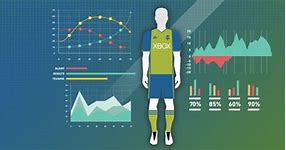

Welcome to my Jupyter Notebook on how to build a winning Fantasy Premier League team! In this project, I will show you how to scrape data from the web using Python's `requests` library, transform the data using various Python libraries, and build a team that fits your budget and includes the top performers in the Premier League.

Building a winning Fantasy Premier League team requires a combination of skill, strategy, and a bit of luck. In this notebook, I will walk you through the steps required to create a competitive team that will help you rise to the top of the league.

This notebook is based on [this notebook](https://github.com/loksoy/fpl_team_selector) by [loksoy](https://github.com/loksoy).


In [ ]:
import requests
import json
import pandas as pd

In [ ]:
# Making API call and storing response
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
print("Status code: ", r.status_code)

Status code:  200


In [ ]:
# Storing API respons in variable
response_dict = r.json()

In [ ]:
# Exploring different keys
print(response_dict.keys())

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])


In [ ]:
# Asssesing the content of a single player
print(response_dict['elements'][1])

{'chance_of_playing_next_round': 0, 'chance_of_playing_this_round': 0, 'code': 153256, 'cost_change_event': 0, 'cost_change_event_fall': 0, 'cost_change_start': -4, 'cost_change_start_fall': 4, 'dreamteam_count': 1, 'element_type': 3, 'ep_next': '0.0', 'ep_this': '0.0', 'event_points': 0, 'first_name': 'Mohamed', 'form': '0.0', 'id': 4, 'in_dreamteam': False, 'news': 'Knee injury - Unknown return date', 'news_added': '2023-01-26T10:00:07.778526Z', 'now_cost': 41, 'photo': '153256.jpg', 'points_per_game': '1.2', 'second_name': 'Elneny', 'selected_by_percent': '0.7', 'special': False, 'squad_number': None, 'status': 'i', 'team': 1, 'team_code': 3, 'total_points': 6, 'transfers_in': 197660, 'transfers_in_event': 422, 'transfers_out': 266634, 'transfers_out_event': 1966, 'value_form': '0.0', 'value_season': '1.5', 'web_name': 'Elneny', 'minutes': 111, 'goals_scored': 0, 'assists': 0, 'clean_sheets': 0, 'goals_conceded': 2, 'own_goals': 0, 'penalties_saved': 0, 'penalties_missed': 0, 'yello

In [ ]:
# Asssesing the content of a team
print(response_dict['teams'][1])

{'code': 7, 'draw': 0, 'form': None, 'id': 2, 'loss': 0, 'name': 'Aston Villa', 'played': 0, 'points': 0, 'position': 0, 'short_name': 'AVL', 'strength': 3, 'team_division': None, 'unavailable': False, 'win': 0, 'strength_overall_home': 1070, 'strength_overall_away': 1100, 'strength_attack_home': 1070, 'strength_attack_away': 1075, 'strength_defence_home': 1070, 'strength_defence_away': 1130, 'pulse_id': 2}


## MAPPING PLAYER TEAMS AND POSITIONS

In [ ]:
# Team id's
teams = response_dict['teams']

team_list = []
for team in teams:
    team_id = {
        team['code'] : team['name']
    }
    team_list.append(team_id)

In [ ]:
team_dict = {}
for team in team_list:
    team_dict.update(team)

print(team_dict)

{3: 'Arsenal', 7: 'Aston Villa', 91: 'Bournemouth', 94: 'Brentford', 36: 'Brighton', 8: 'Chelsea', 31: 'Crystal Palace', 11: 'Everton', 54: 'Fulham', 13: 'Leicester', 2: 'Leeds', 14: 'Liverpool', 43: 'Man City', 1: 'Man Utd', 4: 'Newcastle', 17: "Nott'm Forest", 20: 'Southampton', 6: 'Spurs', 21: 'West Ham', 39: 'Wolves'}


In [ ]:
# Position id's
element_types = response_dict['element_types']

position_list = []
for element_type in element_types:
    position_id = {
        element_type['id'] : element_type['plural_name_short']
    }
    position_list.append(position_id)

In [ ]:
position_dict = {}
for position in position_list:
    position_dict.update(position)

print(position_dict)

{1: 'GKP', 2: 'DEF', 3: 'MID', 4: 'FWD'}


### FILTER WANTED FEATURES AND CREATE DATAFRAME

In [ ]:
wanted_features = ['first_name', 'second_name', 'team_code','element_type','news','now_cost', 'total_points', 'minutes',
                   'form',  'value_season', 'points_per_game', 'value_form',
                    'goals_scored', 'assists', 'dreamteam_count','clean_sheets', 
                   'goals_conceded', 'own_goals','penalties_saved', 'penalties_missed',
                   'yellow_cards', 'red_cards', 'saves', 'bonus',
                   'influence', 'creativity', 'threat', 'ict_index', 'selected_by_percent'
                  ]

In [ ]:
player_data = response_dict['elements']

In [ ]:
# Converting the list of players to a DataFrame
players_df = pd.DataFrame(player_data)
# Choosing only the columns that we want
players_df = players_df[wanted_features]
players_df.head()

,first_name,second_name,team_code,element_type,news,now_cost,total_points,minutes,form,value_season,...,penalties_missed,yellow_cards,red_cards,saves,bonus,influence,creativity,threat,ict_index,selected_by_percent
0,Granit,Xhaka,3,3,,49,87,1946,2.0,17.8,...,0,3,0,0,7,434.4,500.7,336.0,127.2,2.8
1,Mohamed,Elneny,3,3,Knee injury - Unknown return date,41,6,111,0.0,1.5,...,0,0,0,0,0,4.6,5.4,0.0,1.1,0.7
2,Rob,Holding,3,2,,42,7,17,0.2,1.7,...,0,0,0,0,0,3.4,0.1,0.0,0.3,0.1
3,Thomas,Partey,3,3,Muscle injury - 75% chance of playing,47,57,1540,1.0,12.1,...,0,2,0,0,5,342.8,293.1,172.0,80.9,0.4
4,Martin,Ødegaard,3,3,,70,131,1868,3.5,18.7,...,0,3,0,0,21,572.6,744.3,600.0,191.9,37.9


### ENRICHING DATAFRAME AND MANIPULATING DATA

In [ ]:
# Replacing team_code with team name
players_df = players_df.replace({'team_code': team_dict})

# Replacing id with position
players_df = players_df.replace({'element_type': position_dict})

In [ ]:
# Renaming columns
players_df = players_df.rename(columns={'team_code': 'team', 'element_type':'position'})
players_df.head()

,first_name,second_name,team,position,news,now_cost,total_points,minutes,form,value_season,...,penalties_missed,yellow_cards,red_cards,saves,bonus,influence,creativity,threat,ict_index,selected_by_percent
0,Granit,Xhaka,Arsenal,MID,,49,87,1946,2.0,17.8,...,0,3,0,0,7,434.4,500.7,336.0,127.2,2.8
1,Mohamed,Elneny,Arsenal,MID,Knee injury - Unknown return date,41,6,111,0.0,1.5,...,0,0,0,0,0,4.6,5.4,0.0,1.1,0.7
2,Rob,Holding,Arsenal,DEF,,42,7,17,0.2,1.7,...,0,0,0,0,0,3.4,0.1,0.0,0.3,0.1
3,Thomas,Partey,Arsenal,MID,Muscle injury - 75% chance of playing,47,57,1540,1.0,12.1,...,0,2,0,0,5,342.8,293.1,172.0,80.9,0.4
4,Martin,Ødegaard,Arsenal,MID,,70,131,1868,3.5,18.7,...,0,3,0,0,21,572.6,744.3,600.0,191.9,37.9


In [ ]:
# Combining first and last name to one column
players_df['player_name'] = players_df['first_name'].str.cat(players_df['second_name'], sep=' ')
# Removing first_name and second_name columns
players_df = players_df.drop(['first_name', 'second_name'], axis=1)

In [ ]:
def unavailable(row):
    '''
    A function to track injuries and instances
    where the player minght be unavailable
    '''
    if row['news'] != '':
        return True
    else:
        return False

In [ ]:
# Using function to create new column:
players_df['unavailable'] = players_df.apply(lambda row: unavailable(row), axis=1)
players_df.head()

,team,position,news,now_cost,total_points,minutes,form,value_season,points_per_game,value_form,...,red_cards,saves,bonus,influence,creativity,threat,ict_index,selected_by_percent,player_name,unavailable
0,Arsenal,MID,,49,87,1946,2.0,17.8,3.8,0.4,...,0,0,7,434.4,500.7,336.0,127.2,2.8,Granit Xhaka,False
1,Arsenal,MID,Knee injury - Unknown return date,41,6,111,0.0,1.5,1.2,0.0,...,0,0,0,4.6,5.4,0.0,1.1,0.7,Mohamed Elneny,True
2,Arsenal,DEF,,42,7,17,0.2,1.7,1.0,0.0,...,0,0,0,3.4,0.1,0.0,0.3,0.1,Rob Holding,False
3,Arsenal,MID,Muscle injury - 75% chance of playing,47,57,1540,1.0,12.1,3.2,0.2,...,0,0,5,342.8,293.1,172.0,80.9,0.4,Thomas Partey,True
4,Arsenal,MID,,70,131,1868,3.5,18.7,6.0,0.5,...,0,0,21,572.6,744.3,600.0,191.9,37.9,Martin Ødegaard,False


In [ ]:
# Rearranging order to get name as the first column
players_df = players_df[['player_name', 'team','position','unavailable','now_cost', 'total_points', 'minutes',
                   'form',  'value_season', 'points_per_game', 'value_form',
                    'goals_scored', 'assists', 'dreamteam_count','clean_sheets', 
                   'goals_conceded', 'own_goals','penalties_saved', 'penalties_missed',
                   'yellow_cards', 'red_cards', 'saves', 'bonus',
                   'influence', 'creativity', 'threat', 'ict_index', 'selected_by_percent'
                  ]]

In [ ]:
players_df.head()

,player_name,team,position,unavailable,now_cost,total_points,minutes,form,value_season,points_per_game,...,penalties_missed,yellow_cards,red_cards,saves,bonus,influence,creativity,threat,ict_index,selected_by_percent
0,Granit Xhaka,Arsenal,MID,False,49,87,1946,2.0,17.8,3.8,...,0,3,0,0,7,434.4,500.7,336.0,127.2,2.8
1,Mohamed Elneny,Arsenal,MID,True,41,6,111,0.0,1.5,1.2,...,0,0,0,0,0,4.6,5.4,0.0,1.1,0.7
2,Rob Holding,Arsenal,DEF,False,42,7,17,0.2,1.7,1.0,...,0,0,0,0,0,3.4,0.1,0.0,0.3,0.1
3,Thomas Partey,Arsenal,MID,True,47,57,1540,1.0,12.1,3.2,...,0,2,0,0,5,342.8,293.1,172.0,80.9,0.4
4,Martin Ødegaard,Arsenal,MID,False,70,131,1868,3.5,18.7,6.0,...,0,3,0,0,21,572.6,744.3,600.0,191.9,37.9


### CREATING DATAFRAMES OF 'TOP PLAYERS' AND PLAYERS WITH HIGH ROI

In [ ]:
# Creating a dataframe for "Top performing players":
most_points = players_df[['player_name', 'team', 'position', 'total_points', 'now_cost', 'unavailable']]
most_points = most_points.sort_values(by = 'total_points', ascending = False)
most_points.head()

,player_name,team,position,total_points,now_cost,unavailable
470,Erling Haaland,Man City,FWD,183,122,False
645,Harry Kane,Spurs,FWD,155,118,False
494,Marcus Rashford,Man Utd,MID,151,73,False
529,Kieran Trippier,Newcastle,DEF,146,61,False
10,Bukayo Saka,Arsenal,MID,132,84,False


In [ ]:
# Creating dataframe for ROI-players
roi_players = players_df[['player_name', 'team', 'position', 'total_points', 'now_cost', 'unavailable']]
roi_players['roi'] = roi_players.apply(lambda row: row.total_points / row.now_cost, axis=1)
roi_players = roi_players.sort_values(by= 'roi', ascending = False)
roi_players.head()

<ipython-input-48-ef0af5bd2ccc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roi_players['roi'] = roi_players.apply(lambda row: row.total_points / row.now_cost, axis=1)


,player_name,team,position,total_points,now_cost,unavailable,roi
529,Kieran Trippier,Newcastle,DEF,146,61,False,2.393443
117,David Raya Martin,Brentford,GKP,107,47,False,2.276596
541,Miguel Almirón Rejala,Newcastle,MID,125,55,False,2.272727
304,Bernd Leno,Fulham,GKP,97,45,False,2.155556
494,Marcus Rashford,Man Utd,MID,151,73,False,2.068493


### PROGRAM FOR AUTOMATIC TEAM SELECTION

In [ ]:
def choose_team(budget=1000, top_performer_limit=3):
    roi_team = []
    total_points = 0
    position_dict = {"GKP": 2, "DEF": 5, "MID": 5, "FWD": 3}
    teams = response_dict['teams']
    team_list = []
    for team in teams:
        no_players = {
            team['name'] : 3
        }
        team_list.append(no_players)

    team_dict = {}
    for team in team_list:
        team_dict.update(team)
    
    # Choosing 3 top performers from the "top players"-dataframe
    top_3 = []
    for idx, row in most_points.iterrows():
        if budget >= row.now_cost and len(roi_team) < top_performer_limit and row.unavailable == False and position_dict[row.position] != 0 and team_dict[row.team] != 0:
            roi_team.append(row.player_name)
            budget -= row.now_cost #Deducting cost from budget
            position_dict[row.position] -= 1 # Deducting position from position dictionary
            team_dict[row.team] -= 1 # Deducting player from team dictionary
            total_points += row.total_points # adding to point score
            top_3.append(row.player_name)
            
        # Choosing remaining team from "ROI"-dataframe
        else:
            for idx, row in roi_players.iterrows():
                if row.player_name not in roi_team and budget >= row.now_cost and row.unavailable == False and position_dict[row.position] != 0 and team_dict[row.team] != 0:
                    roi_team.append(row.player_name)
                    budget -= row.now_cost
                    position_dict[row.position] -= 1 # Deducting position from position dictionary
                    team_dict[row.team] -= 1 # Deducting player from team dictionary
                    total_points += row.total_points # adding to point score

    result = dict()
    result['Best Players'] = str(top_3)
    result['Team'] = str(roi_team)
    result['Remaining Budget'] = str((budget/10)) + "M."
    result['Total points from chosen team'] = str(total_points) + "."
    result['Positional dict'] = position_dict

    return result

In [ ]:
#Running function to choose team
output = choose_team()

In [59]:
# Format the output as a string
output_str = f"Best Players: {output['Best Players']}\nTeam chosen: {output['Team']}\nRemaining budget: {output['Remaining Budget']}\nTotal points from chosen team: {output['Total points from chosen team']}"

In [60]:
print(output_str)

Best Players: ['Erling Haaland', 'Harry Kane', 'Marcus Rashford']
Team chosen: ['Erling Haaland', 'Harry Kane', 'Marcus Rashford', 'Kieran Trippier', 'David Raya Martin', 'Miguel Almirón Rejala', 'Bernd Leno', 'Solly March', 'Andreas Hoelgebaum Pereira', 'Dan Burn', 'Benjamin White', 'Ben Mee', 'Martin Ødegaard', 'William Saliba', 'Ivan Toney']
Remaining budget: 4.1M.
Total points from chosen team: 1785.
